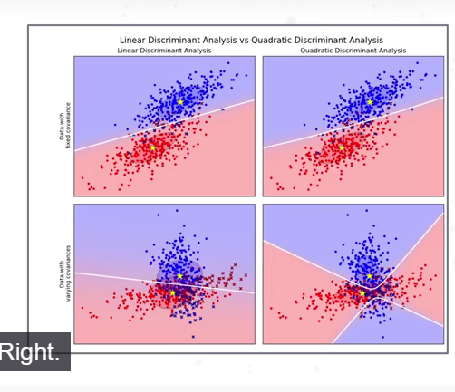

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [2]:
df = pd.read_csv('../../EDA/CustomerChurn.csv')


In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')
df.dropna(how='any',inplace=True)


In [6]:
df.drop(['customerID'], axis ='columns',inplace=True)

In [7]:
#Dummy Encoding

df = pd.get_dummies(df,drop_first=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7032 non-null   int64  
 1   tenure                                 7032 non-null   int64  
 2   MonthlyCharges                         7032 non-null   float64
 3   TotalCharges                           7032 non-null   float64
 4   gender_Male                            7032 non-null   bool   
 5   Partner_Yes                            7032 non-null   bool   
 6   Dependents_Yes                         7032 non-null   bool   
 7   PhoneService_Yes                       7032 non-null   bool   
 8   MultipleLines_No phone service         7032 non-null   bool   
 9   MultipleLines_Yes                      7032 non-null   bool   
 10  InternetService_Fiber optic            7032 non-null   bool   
 11  InternetS

In [9]:
# Considering Churn -> Y Variable
# Other Columns -> X Variable

X= df.drop(['Churn_Yes'],axis=1)
y = df['Churn_Yes']

In [10]:
# Split the data

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=40)

In [11]:
# Base Model

model_orig = LogisticRegression()
model_orig.fit(X_train,y_train)
y_pred_orig = model_orig.predict(X_test)

accuracy = accuracy_score(y_test,y_pred_orig)
print(accuracy_score(y_test,y_pred_orig))

0.7995260663507109


c:\Users\HP\Desktop\Interview Prep\AI Engineer\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [12]:
# Apply Linear Discriminant Analysis 


from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA


In [13]:
lda = LDA()
X_train_lda = lda.fit_transform(X_train,y_train)
# X_train and y_train both
X_test_lda = lda.transform(X_test)

In [14]:
X_train_lda

array([[ 2.13878774],
       [-0.89986122],
       [-1.97428998],
       ...,
       [-0.70063549],
       [-0.88364362],
       [-1.58553056]])

In [15]:
explained_variance = lda.explained_variance_ratio_

In [16]:
explained_variance

array([1.])

In [17]:
# Training the logistic regression model on the new training set

model_lda = LogisticRegression()
model_lda.fit(X_train_lda,y_train)
y_pred_lda = model_lda.predict(X_test_lda)

accuracy_lda = accuracy_score(y_test,y_pred_lda)
print(accuracy_lda)

0.7876777251184834


In [18]:
# Gone down from 30 dimension to 10 dimension still we are getting a nearmost similiar accuracy

# Do it for 10 features, 5 features etc.